# CSCI2000U Final Project 

#### Name of the dataset: Pfizer Vaccine Tweets
https://www.kaggle.com/gpreda/pfizer-vaccine-tweets?select=vaccination_tweets.csv

#### Introduction:
Covid 19 has affected millions around the world. Therefore, it is no surprise that the developement of vaccines has encouraged great amount of discussion around the same. People are keen to express their opinions(positive or negative) on social media. However, such opinions may influence thousands of other users too. The above dataset contains tweets about Pfizer & BioNTech vaccine. The goal of choosing this dataset is to examine how an common twitter user feels about the vaccine along with determining interaction on different accounts(with regards to their followers,friends,location etc). The dataset can also be used to determine if a more popular twitter opinion might influence other users.
This project was created by Prachi Sharma.

##### Description of Data
The dataset is a csv file which contains tweets about Pfizer & BioNTech vaccine over two years(2020 and 2021). The data was collected using tweepy Python package to access Twitter API. The source of the datset was Kaggle. A link to acess the dataset through kaggle has been provided on top of the notebook.


A short description of each column in the dataframe is provided in the following cell.¶

1. user_name: (twitter handle of the user)
2. user_location:  (location of the user)
3. user_description:  (bio of the user)
4. user_created: (account creation date)
5. user_followers:(number of followers)
6. user_friends: (number of friends)
7. user_favourites: (number of likes)
8. user_verified:  (user verified or not)
9. date: (when the tweet was made)
10. text:  (text of the tweet)
11. hashtags:  (hashtags used in the tweet)
12. source:  (platform- android/apple/web/other on which the tweet was made)
13. retweets:  (number of retweets)
14. favourites: (number of likes on the tweet)
15. is_retweet: (whether the tweet was retweeted or not)
16. id: (user id)


##### Data Analysis
We will first import all the used libraries and modules which will be used throughout this project. Then, we will create a dataframe to store the data in. After which, we will do basic data analysis which will be explained throughout by relevant comments

In [1]:
#importing used libraries

import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns


# this aux function will read the CSV file and return the data in a Python dictionary
def get_data_csv(path):
    collection = []
    with open(path, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
         
data = get_data_csv('vaccination_tweets.csv')

In [2]:
df = pd.DataFrame(data)

In [3]:
## getting basic info of all the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  object
 1   user_name         11020 non-null  object
 2   user_location     11020 non-null  object
 3   user_description  11020 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  object
 6   user_friends      11020 non-null  object
 7   user_favourites   11020 non-null  object
 8   user_verified     11020 non-null  object
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          11020 non-null  object
 12  source            11020 non-null  object
 13  retweets          11020 non-null  object
 14  favorites         11020 non-null  object
 15  is_retweet        11020 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [4]:
# displaying the first few rows of the dataset

df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


A quick look at the dataset reveals that there are quite a few columns which contain empty strings as their elements. For now, we will replace all the empty strings as NAN values. 

In [5]:

df = df.replace(r'^\s*$', np.NaN, regex=True)
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


Finally, we will fill NAN values with a string called 'unknown'. This is done to account for instances where the location of the user is not given 

In [6]:
# fiiling NaN values with unknown
df['user_location'].fillna('unknown', inplace=True)
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,unknown,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,unknown,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [7]:
## looking for null values in the dataframe
print(df.isnull().sum())


id                     0
user_name              0
user_location          0
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64


To further refine the dataset, we will now check for any duplicate rows in the datframe.

In [8]:
print(df.duplicated().sum())

0


In [9]:
# using dropna() to drop the rows that failed the conversion
df = df.dropna(subset=['date'])
df = df.dropna(subset=['user_created'])

df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,unknown,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,unknown,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


##### Getting to know your data 
This part will focus on finding unique number of elements in different columns. Our analysis leads us to the conclusion that there exists users who have tweeted more than once on the topic of vaccines 

In [10]:
# finding the number of unique user_names
user_name_unique = df['user_name'].value_counts()
user_name_unique

theSun                                  106
New Straits Times                        97
CHEManager International                 76
TheRag                                   49
🕷Financial Bear 3.5%                     45
                                       ... 
RED FM™                                   1
Harri Lloyd-Williams FRSPH                1
J R B Patel - not WOKE, just awake 💙      1
SGoldberg-Stein, MD                       1
Sujan                                     1
Name: user_name, Length: 7202, dtype: int64

In [11]:
# finding the number of unique user_location
location_unique = df['user_location'].value_counts()
location_unique

unknown              2276
Malaysia              168
London, England       142
India                 127
Petaling Jaya         106
                     ... 
London/Surrey           1
the world               1
Clare, Ireland          1
Epsom, South East       1
RSA /Global             1
Name: user_location, Length: 3136, dtype: int64

Above findings are not necessarily true as the value_counts() function counts a particular country and a city inside that country as two separate locations. For instance, India and Chennai, India are counted as two separate locations. To overcome, this problem we will be using the module pycountry and writing down a function to classify a country and a city inside the country as a single location 

In [12]:
# finding the number of unique user_description
user_description_unique = df['user_description'].value_counts()
user_description_unique

Breaking news updates from the website of Malaysia's free and largest circulating urban newspaper. Like Thesundaily on Facebook & Instagram.                      106
News, views and up-to-date reports from Malaysia's premier news source. All that and more at https://t.co/S8jbx5pMaF                                               97
Wiley’s leading media brand providing first-hand information on the global chemical, life science and process industries.  https://t.co/xh8S6IJnaB                 76
siya@mmvii.co.za/heelextension@gmail.com                                                                                                                           49
Pro the EU for the opportunities it offers citizens.Lower tax,less authority, power to the people not politicians. Love coffee,running, Formula-E                  45
                                                                                                                                                                 ... 
A gi

In [13]:
# finding the maximum and minimum number of user_followers
print(df['user_followers'].max())
print(df['user_followers'].min())

999
0


In [14]:
# finding the maximum and minimum number of user_favourites
print(df['user_favourites'].max())
print(df['user_favourites'].min())

999
0


##### Cleaning all the dates
Since both user_location and date data columns are of object datatypes. It is necessary to convert them into datetime objects to be able to manipulate those columns according to our requirement. I will be using to_datetime function to achieve this. To avoid unnecessary noise, I would also be keeping only a part of the datetime object [year, month]. Furthermore, I will also extract year and month from the column 'date' and store the respective values in new columns. This is done in order to aid in Exploratory Data Analysis.

In [15]:
# converting object values to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['user_created'] = pd.to_datetime(df['user_created'], errors = 'coerce')
df


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,unknown,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,unknown,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [16]:
# using dt.to_period to extract only year and month from user_created
df['user_created'] = df['user_created'].dt.to_period('M')

## new columns to store year and month extracted from date 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#using dt.to_period to extract only year and month from user_created
df['date'] = df['date'].dt.to_period('M')

df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04,405,1692,3247,False,2020-12,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,Dec
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09,834,666,178,False,2020-12,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,2020,Dec
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06,10,88,155,False,2020-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,Dec
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09,49165,3933,21853,True,2020-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,2020,Dec
4,1337854064604966912,Citizen News Channel,unknown,Citizen News Channel bringing you an alternati...,2020-04,152,580,1473,False,2020-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07,151937,465,593,False,2021-11,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False,2021,Nov
11016,1460809350792896516,Sujan,unknown,________________________ •Napricorn• •It's jus...,2013-01,4259,622,156941,False,2021-11,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False,2021,Nov
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07,151937,465,593,False,2021-11,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False,2021,Nov
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08,1,38,99,False,2021-11,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,2021,Nov


### Cleaning the text


###### Pre-processing the text
We will be cleaning the text column that is, preprocessing the data to make it easy to work with. We will be removing characters such as emojis, hashtags, mentions, punctuations and urls. Firstly, we will take a look at some of the text elements to help us identify characters that could create problems 


In [17]:
df['text'][0]

'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF'

In [18]:
df['text'][11016]

'First dose ✅\n#PfizerBioNTech'

In [19]:
df['text'][11019]

'The number of Covid-19 cases today, 15 November 2021.\nRemember to observe safety and protective measures when you’r… https://t.co/UuPsEbh4i0'

In [20]:
# converting all the text characters into lowercase characters
df['text']  = df["text"].apply(lambda x: str.lower(x))

# using replace to replace any problemetic character with a empty string
df['text']  = df['text'].apply(lambda x: x.replace('$', " ") )
df['text']  = df['text'].apply(lambda x: x.replace('\d+'," "))
df['text'] = df['text'].apply(lambda x: x.replace('#', " ") )
df['text'] = df['text'].apply(lambda x: x.replace('@[A-Za-z0-9]+', " ") )
df['text'] = df['text'].apply(lambda x: x.replace('\xa0+', " ") )
df['text'] = df['text'].apply(lambda x: x.replace('https?://\S+|www\.\S+', " ") )
df['text'] = df['text'].apply(lambda x: x.replace('https?://\S+|www\.\S+', " ") )
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# removing emojis
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

df


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04,405,1692,3247,False,2020-12,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,Dec
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09,834,666,178,False,2020-12,while the world has been on the wrong side of ...,nan,Twitter Web App,1,1,False,2020,Dec
2,1337858199140118533,eli,Your Bed,"heil, hydra",2020-06,10,88,155,False,2020-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,Dec
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09,49165,3933,21853,True,2020-12,facts are immutable senator even when youre no...,nan,Twitter Web App,446,2129,False,2020,Dec
4,1337854064604966912,Citizen News Channel,unknown,Citizen News Channel bringing you an alternati...,2020-04,152,580,1473,False,2020-12,explain to me again why we need a vaccine bori...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07,151937,465,593,False,2021-11,the number of covid19 cases today 17 november ...,nan,Twitter Web App,2,6,False,2021,Nov
11016,1460809350792896516,Sujan,unknown,________________________ Napricorn It's just a...,2013-01,4259,622,156941,False,2021-11,first dose \n pfizerbiontech,['PfizerBioNTech'],Twitter for Android,0,4,False,2021,Nov
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07,151937,465,593,False,2021-11,the number of covid19 cases today 16 november ...,nan,Twitter Web App,3,5,False,2021,Nov
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08,1,38,99,False,2021-11,pfizerbiontech has developed new pill paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,2021,Nov


### Exploratory Data analysis

Through EDA , we will try to answer the following questions:
1. What are the total number of tweets made per month and year?Plot a line chart to display the same.
2. Which locations were most active in tweeting about the vaccines? Display the top 10 locations using a bar chart
3. Is it possible that verified accounts have more influence(in terms of user favourites, retweets)?
4. Which platforms were behind the maximum number of tweets in the following dataset?
5. Is it possible that the dataset contains users who have made than one tweets on the vaccines? If yes, then find the top 10 users
6. What words were most frequently used in tweets? Use a wordcloud to display the same
7. What is the overall sentiment behind each tweet?

###### Part 1 :
We would we using a pivot table to plot a line chart. Firstly, a pivot table is constructed using months and years as the row and columns respectively. Then, we would be creating a simple line chart to display the amount of tweets made per month and year.

In [21]:
# constructing a pivot table
df_pivot = pd.pivot_table(data=df, 
                        index=['month'], 
                        columns=['year'], values= ['date'] , aggfunc = len, fill_value = 0)

# reindexing the months 
print(df_pivot.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']))

       date      
year   2020  2021
month            
Jan       0  3029
Feb       0  1336
Mar       0  1171
Apr       0   566
May       0   539
Jun       0   306
Jul       0   535
Aug       0   781
Sep       0   384
Oct       0   220
Nov       0   173
Dec    1980     0


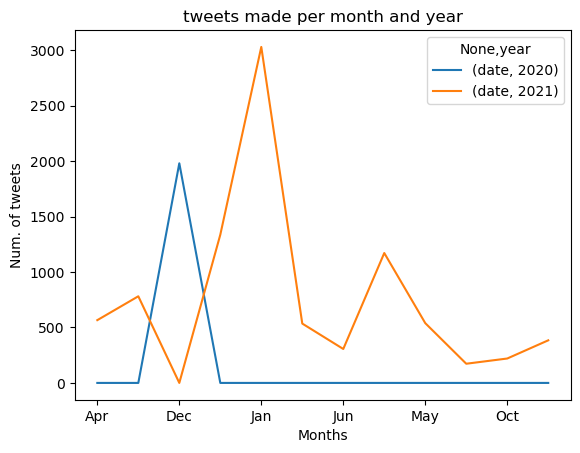

In [22]:
# constructing a pivot plot 

df_pivot.plot()
plt.ylabel('Num. of tweets');
plt.xlabel('Months')
plt.title('tweets made per month and year')
plt.show()

##### Part 2 
To solve the second question, we would be using DatetimeIndex function to extract the respective year from the date column. Then, we will count the number of occurences using value_counts. Finally, a bar chart is constructed which will represent the top 10 countries. 

In [23]:
# date has only two unique years namely 2020 and 2021.

pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2020, 2021], dtype='int64', name='date')

In [24]:
# Num_2020 and Num_2021 will hold the amount of tweets made in 2020 and 2021 respectively. 

Num_2020 = df['user_location'][pd.DatetimeIndex(df['date']).year == 2020].value_counts()
Num_2021 = df['user_location'][pd.DatetimeIndex(df['date']).year == 2021].value_counts()

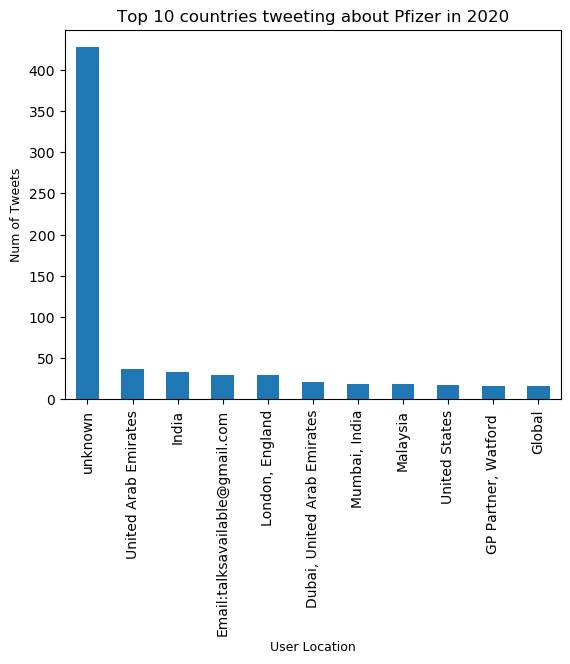

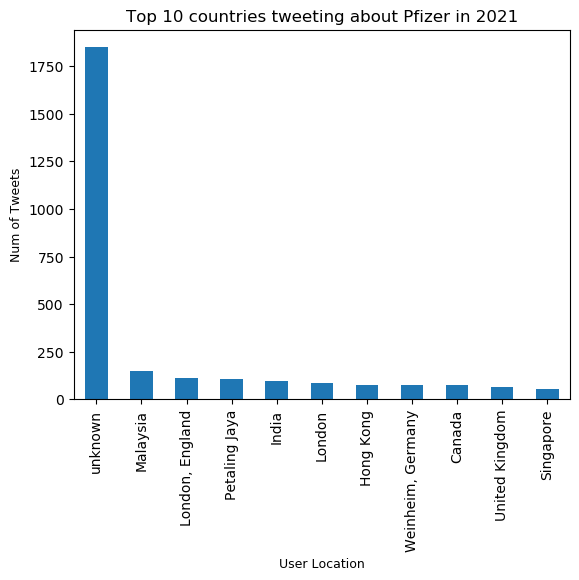

In [25]:
# plotting the bar chart 
plt.xlabel("User Location", fontsize = 9)
plt.ylabel("Num of Tweets", fontsize = 9)

## displaying the top 10 countries in 2020 
Num_2020[0:11].plot(kind='bar', title = "Top 10 countries tweeting about Pfizer in 2020", )
plt.show()

plt.xlabel("User Location", fontsize = 9)
plt.ylabel("Num of Tweets", fontsize = 9)

#displaying the top 10 countries in 2021
Num_2021[0:11].plot(kind='bar', title = "Top 10 countries tweeting about Pfizer in 2021", )
plt.show()

##### Part 3
The third questions requires us to examine whether a verified acccount would tend to have more influence. Here, influence is subjective though. For the sake of simplicity, we will just assume that if the tweet has more interaction(more user_favourites and retweets), then it has reached a broader audience and has more influence. Generally, Verified account have mor followers and friends. So, a tweet made by them is bound to have more interaction. We would be comparing the average number of retweets, favourites and followers of a verified account with that of a normal one. To achieve this, We would be creating a separate dataset that only includes verified accounts. 

In [26]:
# creating a dataset which includes verified users only. 
df2 = df[df['user_verified'] == 'True']
df2

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09,49165,3933,21853,True,2020-12,facts are immutable senator even when youre no...,nan,Twitter Web App,446,2129,False,2020,Dec
7,1337850832256176136,Dr.Krutika Kuppalli,unknown,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03,21924,593,7815,True,2020-12,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,2020,Dec
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to Indias first ...,2016-03,292510,91,7531,True,2020-12,the agency also released new information for h...,nan,TweetDeck,0,18,False,2020,Dec
13,1337809196453081088,Dr.Krutika Kuppalli,unknown,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03,21924,593,7815,True,2020-12,for all the women and healthcare providers who...,['PfizerBioNTech'],Twitter for iPhone,48,82,False,2020,Dec
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06,66224,603,771,True,2020-12,trump announces vaccine rollout in less than ...,['vaccine'],Twitter for iPhone,0,1,False,2020,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913,1458247505380974592,New Straits Times,Malaysia,"News, views and up-to-date reports from Malays...",2009-07,768062,431,1087,True,2021-11,nstworld drugmakers pfizerbiontech announce...,"['NSTworld', 'PfizerBioNTech']",TweetDeck,1,3,False,2021,Nov
10919,1457977296720068612,Jonathan Hicap,unknown,"Journalist, Manila Bulletin. Covers news and H...",2010-04,2011,343,18670,True,2021-11,manila bulletin 5600 minors now vaccinated in ...,"['Muntinlupa', 'COVID19', 'vaccination']",Twitter Web App,2,7,False,2021,Nov
10936,1459069346119135234,Ido Daniel,Israel,Israeli Jew with Turkish and Iraqi roots. Digi...,2011-08,19880,1435,7278,True,2021-11,israel has approved coronavirus vaccination f...,"['Israel', 'CovidVaccine', 'PfizerBioNTech']",Twitter for iPhone,0,3,False,2021,Nov
10986,1461999041739247623,New Straits Times,Malaysia,"News, views and up-to-date reports from Malays...",2009-07,768491,431,1087,True,2021-11,nstworld iraq said it has received 12 milli...,"['NSTworld', 'Iraq', 'PfizerBioNTech', 'Covid1...",TweetDeck,3,2,False,2021,Nov


In [27]:
# to avoid warnings of chained assignment. This would not affect us as we will not use this dataset agin after completing our task. 
pd.options.mode.chained_assignment = None

# Since all the columns in the df2 are of object datatype, we will convert relevant columns into integer types to calcualte averages. 
df2['retweets'] = df2['retweets'].astype(int)
Avg_retweets = df2['retweets'].mean()

df2['user_followers'] = df2['user_followers'].astype(int)
Avg_followers = df2['user_followers'].mean()


print(Avg_retweets.round())
print(Avg_followers.round())


7.0
367623.0


In [28]:
df['retweets'] = df['retweets'].astype(int)
Avg_retweetsf = df['retweets'].mean()

df['user_followers'] = df['user_followers'].astype(int)
Avg_followersf = df['user_followers'].mean()



print(Avg_retweetsf.round())
print(Avg_followersf.round())


1.0
35188.0


We observe that verified accounts have more retweets and followers as compared to normal coounts.

To back ourselves further, I would be sorting df3 dataset by retweets in a descending order. We can clearly see that the tweets with the most retweets are usually made by a verified account. 

In [29]:
# displaying the top 10 users with most retweets in descending order
df3 = df.sort_values(ascending=False, by='retweets')[:10][['id','user_name', 'user_verified', 'text', 'retweets']]
df3

,id,user_name,user_verified,text,retweets
3440,1350535798366547969,The Epoch Times,True,55 people in the us have died after receiving ...,678
3,1337855739918835717,Charles Adler,True,facts are immutable senator even when youre no...,446
4213,1352443555957010438,KKMalaysia,True,what do you need to know about pfizerbiontech...,389
5364,1358911980267057161,"Ruth Ann Crystal, MD",False,please retweet\n\ncomparison of the 6 top covi...,324
183,1338287664454393858,Anita Anand,True,welcoming the 1st covid19vaccines to tonight...,284
6268,1365357054626570242,"Ruth Ann Crystal, MD",False,updated 22621\n\ncomparison of the 6 top covid...,236
3004,1348068786587500547,Anita Anand,True,has received amp distributed over half a mill...,230
2826,1347921247083122689,Chris Ship,True,a palace source said the vaccines were adminis...,199
922,1340456887817560065,The Epoch Times,True,the usfda is investigating around 5 allergic r...,176
6092,1364673685219598346,Dr. Melvin Sanicas,False,who strategic advisory group of experts sage r...,117


##### Part 4 
To solve the fourth question, we will simply plot a bar chart to display the platforms through which maximum number of tweets have been made in ur dataset.  

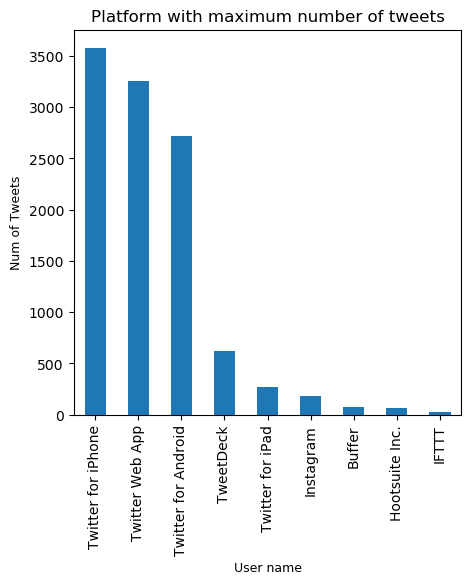

In [30]:
# plotting the bar chart
plt.figure(figsize=(5,5))

# source will contain the total amount of tweets made through each platform
source = df['source'].value_counts().sort_values(ascending=False)

plt.xlabel("User name", fontsize = 9)
plt.ylabel("Num of Tweets", fontsize = 9)

source[0:9].plot(kind='bar', title = "Platform with maximum number of tweets", )
plt.show()

##### Part 5 
The fifth question asks us to examine the possibility of users tweeting more than once. Through basic data analysis performed in early parts of the project, we already know that the same is true. This conclusion is justified because when we measure the total number of unique usernames in the dataset, we get an answer of 7202 which is significantly less than the total entries in the dataset. This can only mean that some of the users have tweeted more than once. We will be using a similar strategy from the fourth part to plot the top 10  users. 

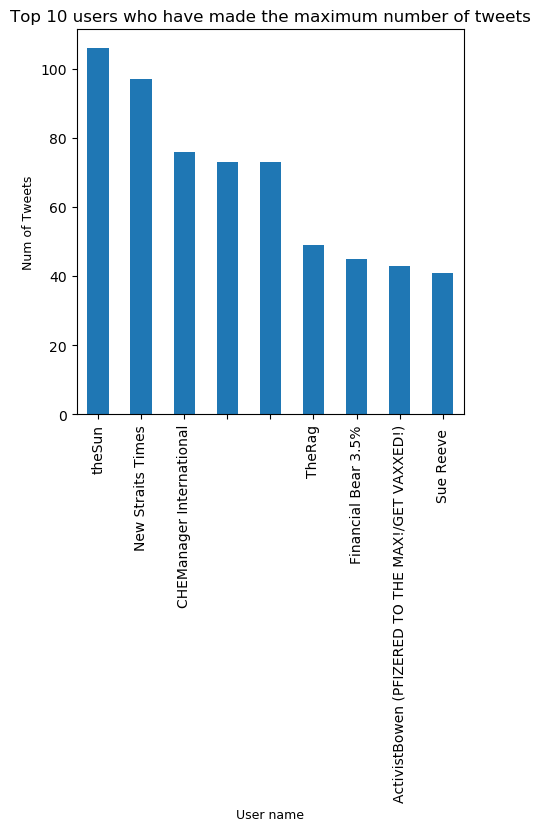

In [31]:
## plotting the bar chart
plt.figure(figsize=(5,5))

# user_name_count will contain the total amount of tweets made by each user
user_name_count = df['user_name'].value_counts().sort_values(ascending=False)
plt.xlabel("User name", fontsize = 9)
plt.ylabel("Num of Tweets", fontsize = 9)

# displaying the 10 users who have made the maximum amount of tweets
user_name_count[0:9].plot(kind='bar', title = "Top 10 users who have made the maximum number of tweets", )
plt.show()

##### Part 6 
The most efficient way to find out and display the most frequently used words in the  tweet is to create a wordcloud. Firstly, we would be installing the wordcloud library and performing all the necessary imports. Then, we will be wrting a relevant function to display our wordcloud. 

In [32]:
# installing wordcloud library 

import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS



     |████████████████████████████████| 366 kB 4.6 MB/s eta 0:00:01


In [33]:
stopwords_ = set(STOPWORDS)

# function to plot wordcloud 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud( collocations=False,stopwords=stopwords_,background_color = 'white',max_words=200, max_font_size=25).generate(str(data))

    fig = plt.figure(1, figsize=(5, 5))
    plt.axis('off')
    
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
    

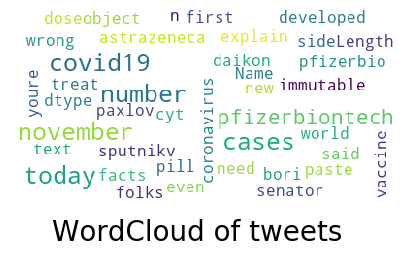

In [34]:
# calling show_wordcloud function
show_wordcloud(df['text'], "WordCloud of tweets")


##### Part 7 
Sentiment analysis is an important application of data analysis. The library is specifically attuned to specific sentiments expressed on different social media platforms. For example, if there is a tweet such as "Love the idea of the #Covid 19 vaacine reaching us soon." vaderSentiment will pick up on the word "love" and classify the tweet as being positive. 

To solve part 7, we will use vader Sentiment analysis to analyse tweets and classify them into three categories namely Positive, negative and neutral 

In [47]:
# installing vaderSentiment and sklearn 
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install vaderSentiment
!{sys.executable} -m pip install nltk
!{sys.executable} -m nltk.downloader vader_lexicon


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

In [55]:
# calling TfidVectorizer
# TfidfVectorizer maps the most frequent words to features indices and form a word occurrence frequency matrix.

tf_data = TfidfVectorizer()

# creating a dataframe which is a copy of the dataframe df
df4 = df.copy()
sentiment = vader()

# calculate polarity scores for each tweet 
sentiment=[sentiment.polarity_scores(i) for i in df4['text'].values]

df4['Score']=[i['compound'] for i in sentiments]

value =df4['Score'].values

# creating a column called sentiment based on the Compound Score of each tweet . 
listf=[]
for i in value:
    if i<=-0.05 :
        listf.append('Negative')
    elif i >=0.05 :
        listf.append('Positive')
    else:
        listf.append('Neutral')
        
df4['Sentiment']=listf

In [56]:
# displaying the first few records of the vader 
df4.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,Score,Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04,405,1692,3247,False,2020-12,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,Dec,0.4019,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09,834,666,178,False,2020-12,while the world has been on the wrong side of ...,nan,Twitter Web App,1,1,False,2020,Dec,-0.1027,Negative
2,1337858199140118533,eli,Your Bed,"heil, hydra",2020-06,10,88,155,False,2020-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,Dec,0.2500,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09,49165,3933,21853,True,2020-12,facts are immutable senator even when youre no...,nan,Twitter Web App,446,2129,False,2020,Dec,0.0000,Neutral
4,1337854064604966912,Citizen News Channel,unknown,Citizen News Channel bringing you an alternati...,2020-04,152,580,1473,False,2020-12,explain to me again why we need a vaccine bori...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020,Dec,0.0000,Neutral


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


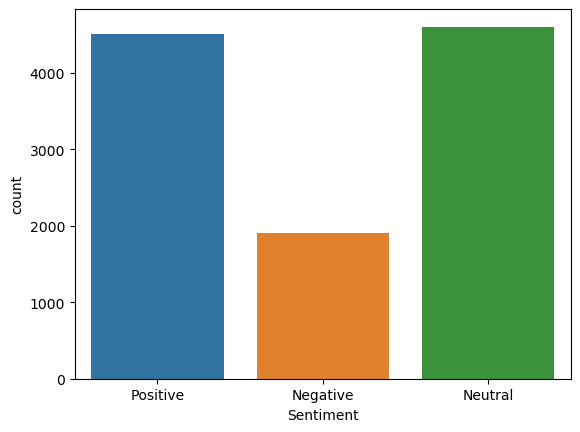

In [60]:
# countplot to show General Sentiment 
sns.countplot(df4['Sentiment'])
plt.show()

#####  Potential for data science or machine learning project applications using this data?
The above dataset has high potential for data science and machine learning projects.  As we did in Task 7 , Sentiment analysis can be performed by using different techniques. We can compare rule based sentiment analysis technique with machine learning (ML) based sentiment analysis to determine which is better for our dataset. In task 7, we used vader Sentiment analysis but it would be interesting to compare textblob and other methods to compare their run time, accuracy etc. Thus, We could construct ML models for predicting the nature of the tweet. Additionally, we can also access datasets which would contain information about vaccination drive for Covid 19 vaccine in different countries. This dataset along with our original dataset(Pfizer vaccination tweets) can be used to determine if the sentiment which is most prevalent in a country regarding the vaccine(positive,negative, or neutral) would have any affect on vaccination drive ongoing in that specific country

##### Conclusion 
The dataset chosen by us showed great potential for data science applications. The said dataset contained tweets made by twiiter users from various locations about pfizer vaccine.
To make dealing with the given data easier, we cleaned different columns such as date and text. For cleaning the date column, to_datetime function was used to convert the objects in the date column to datetime objects. Further, we learnt to extract only month and year from the date in two separate columns. 
In datasets containg tweets, preprocessing of tweets is necessary to analyse our data better. We learnt to remove all special characters such as hashtags,mentions,emojis,punctuations and numeric digits from the tweets.

A pivot table containg the number of tweets made per month and year was also constructed. The pivot table gave us an idea about the timeline during which tweets about the pfizer vaccine were being tweeted the most. Further, by finding the number of unique usernames, we were also able to deduce that some users tweeted more than once on the said topic. The top 10 users who tweeted the maximum number of tweets were shown above with the help of the bar chart. Similarly, we were also able to find out the top 10 locations from where the maximum number of tweets were made. The bar chart displaying the same is displayed above

We also learnt to construct a wordcloud. Wordcloud was used to display the most frequent words used in a tweet. This can be helpful in getting to know the general consensus amongst the users. 

Lastly, we also used Vader sentiment analysis to analyse the general sentiment of the tweet. We learnt to classify tweets as being positive,negative or neutral based on the compound score

##### Limitations and possibilities for refinement:
For further enhancing our analyis, we could try to experient with different sentiment analysis methods. It would be interesting to test out how different methods compare to each other in terms of accuracy.

Furthermore, we could also try to measure the influence of positive/negative tweets made in a country to the vaccination drive taking place over there. This would be done with by accessing different data about the vaccination drives. Then, we would be able to conclude if positive/negative tweets hold any significant influence.

The bar chart displaying the top 10 locations from where the maximum number of tweets were made is not necessarily accurate. The value_counts() function counts a particular country and a city inside that country as two separate locations. For instance, India and  Chennai, India are counted as two separate locations. We could try to define a function which would classify the a city inside a country and the said country as two separate locations. 
